In [1]:
# Loading data

import os
import pandas as pd

path=os.path.join(".","tcc_ceds_music.csv")
dataset=pd.read_csv(path)
original=dataset.copy()
dataset.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


# DATA EXPLORATION

In [2]:
# DATA EXPLORATION
def data_exploration():
    print(f"Shape of data : {dataset.shape}")
    print("----------------------------------------------------------------------------------")
    print(f"Data information : ")
    dataset.info()
    print("----------------------------------------------------------------------------------")
    print(f"Number of null values :\n {dataset.isnull().sum()}")
    print("----------------------------------------------------------------------------------")
    print(f"Data Description : \n{dataset.describe()}")
    
    
data_exploration()

Shape of data : (28372, 31)
----------------------------------------------------------------------------------
Data information : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28372 entries, 0 to 28371
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                28372 non-null  int64  
 1   artist_name               28372 non-null  object 
 2   track_name                28372 non-null  object 
 3   release_date              28372 non-null  int64  
 4   genre                     28372 non-null  object 
 5   lyrics                    28372 non-null  object 
 6   len                       28372 non-null  int64  
 7   dating                    28372 non-null  float64
 8   violence                  28372 non-null  float64
 9   world/life                28372 non-null  float64
 10  night/time                28372 non-null  float64
 11  shake the audience        28372 non-null

In [3]:
# unique values in dataset
def unique_values(df):
    unique_values = []
    col_name = []
    null_values = []
    for col in df.columns:
        unique_values.append(df[col].nunique())
        col_name.append(col)
        null_values.append(df[col].isna().any())
    df_dict = {
        'Features' : col_name,
        'Unique values' : unique_values,
        'Contains Null' : null_values
    }
    return pd.DataFrame(df_dict, columns=['Features','Unique values','Contains Null'])
unique_values(dataset)

,Features,Unique values,Contains Null
0,Unnamed: 0,28372,False
1,artist_name,5426,False
2,track_name,23689,False
3,release_date,70,False
4,genre,7,False
5,lyrics,28372,False
6,len,199,False
7,dating,27918,False
8,violence,28189,False
9,world/life,28195,False


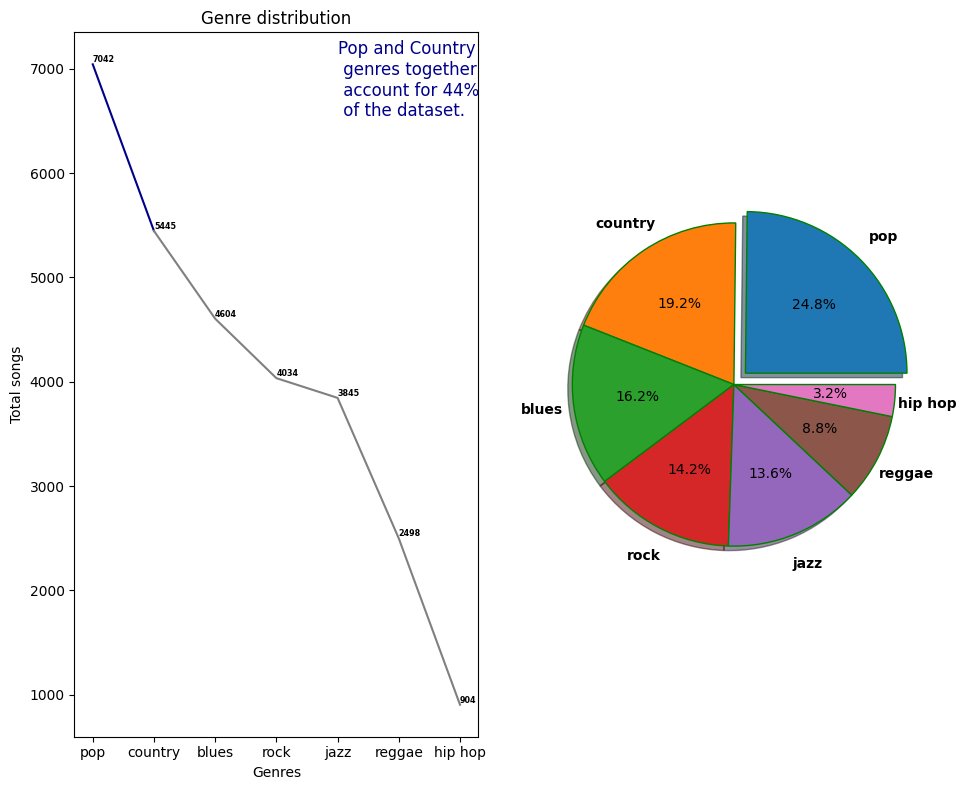

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Genre wise distribution
fig, axes = plt.subplots(1,2, figsize=(10,8))
genres= dataset['genre'].value_counts()
label=dataset['topic'].value_counts().values
highlight_start = 0
highlight_end = 1

# Plotting the line plot segments with different colors
# Segment 1 (before yellow section)
axes[0].plot(genres.index[:highlight_start], genres.values[:highlight_start], color='gray')

# Segment 2 (yellow section)
axes[0].plot(genres.index[highlight_start:highlight_end + 1], genres.values[highlight_start:highlight_end + 1], color='darkblue')

# Segment 3 (after yellow section)
axes[0].plot(genres.index[highlight_end:], genres.values[highlight_end:], color='gray')

# pie plot

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct)
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
patches, texts, autotexts = axes[1].pie(genres.values, labels=genres.index.values,
                            autopct=lambda pct : func(pct,genres.values),
                            explode = (0.1,0.0,0.0,0.0,0.0,0.0,0.0),
                            shadow=True,
                            wedgeprops=wp,
                                       labeldistance=1.2)

# Example: Set the fontsize for better visibility 

axes[0].set_ylabel('Total songs')
axes[0].set_xlabel('Genres')
axes[0].set_title('Genre distribution')
plt.tight_layout()

#add text
for x, y in zip(genres.index, genres.values):
    axes[0].text(x, y, f'{y}', ha='left', va='bottom',fontsize='xx-small',stretch = 'expanded',fontweight='semibold') 
    
for text in texts:
    text.set_fontweight('bold')
    text.set_horizontalalignment('center')
    
# add text
axes[0].text('jazz', 6890, 'Pop and Country\n genres together\n account for 44%\n of the dataset.', ha='left', va='center', fontsize=12,color='darkblue')
plt.show()



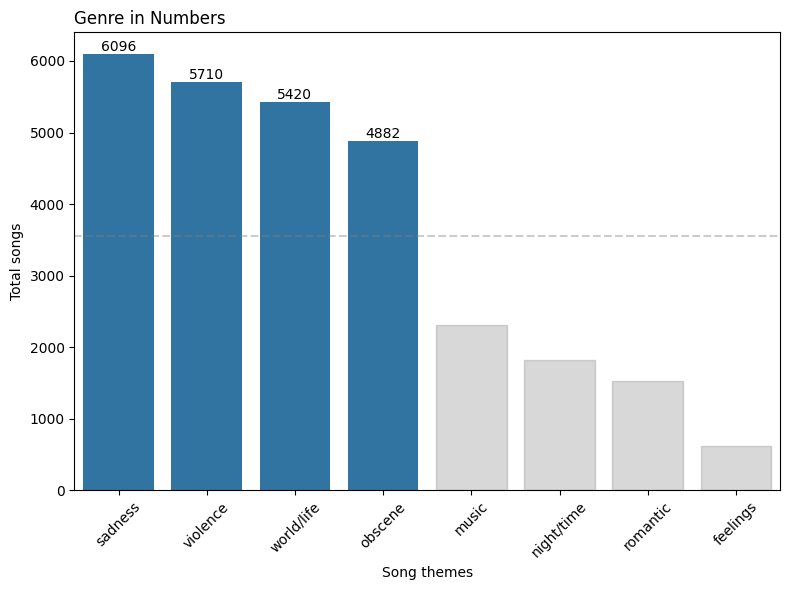

In [5]:

plt.figure(figsize=(8, 6))
g = sns.countplot(data=dataset, x='topic', order=dataset['topic'].value_counts().index)


# Adding labels and title
plt.xlabel('Song themes')
plt.ylabel('Total songs')
plt.title('Genre in Numbers', loc='left')

# mean value
mean =dataset['topic'].value_counts().mean()

# adding mean horizontal line
g.axhline(y = mean, alpha = 0.4,c='gray',linestyle='--',label='mean')


# ignoring color for lower last four bars
for i, bar in enumerate(g.patches):
    if i >= 4:  # Excluding top four bars
        bar.set_color('gray')
        bar.set_alpha(0.3)
    if i < 4:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())), ha='center', va='bottom')



# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<Axes: >

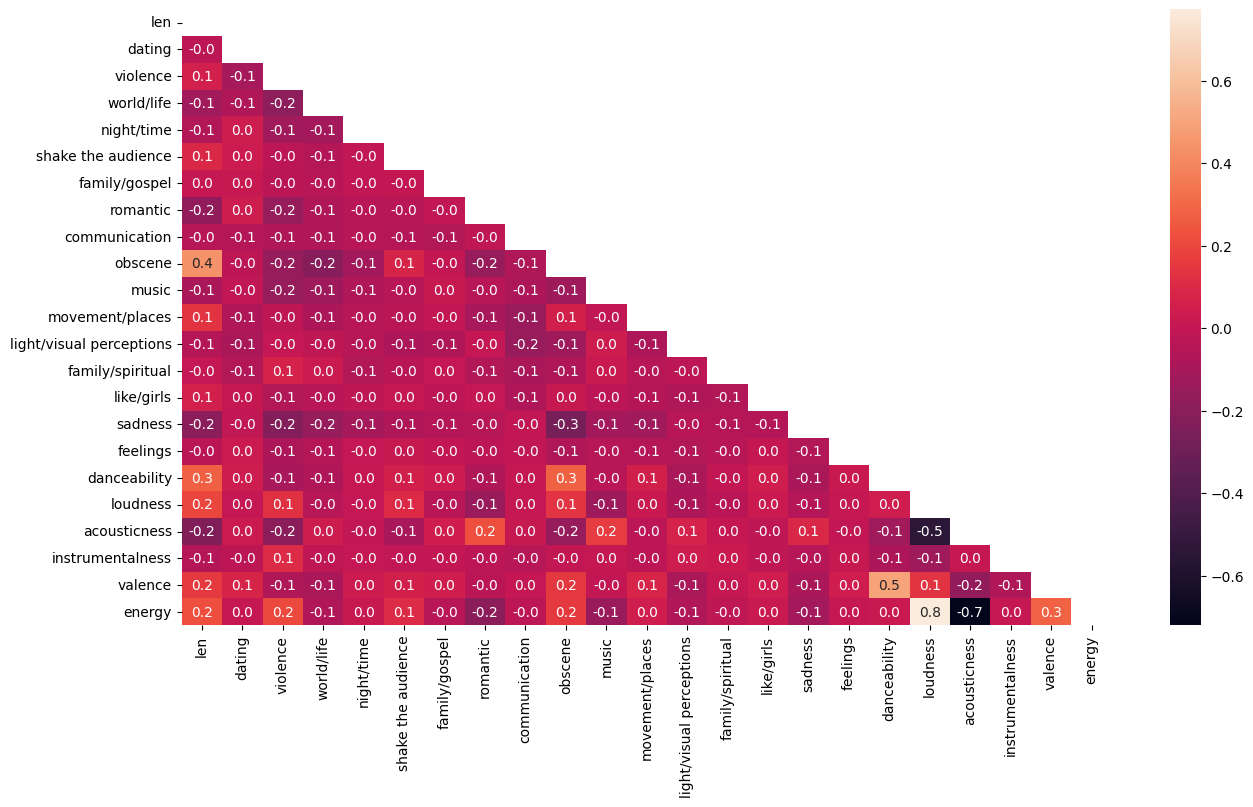

In [6]:
# Extracting only numerical features for correlation
X_numeric=dataset.iloc[:,5:30]
X_numeric = X_numeric.drop(['topic','lyrics'],axis=1)

 # compute the correlation matrix
numeric_corr = X_numeric.corr()

# Generatae a mask for upper triangle
mask = np.triu(np.ones_like(numeric_corr, dtype=bool))

# increase figisze
figure, ax = plt.subplots(figsize=(15,8))
sns.heatmap(
data = numeric_corr, mask = mask, annot=True, fmt='0.1f')

# DATA PREPROCESSING

In [7]:
# REMOVING UNNECESSARY FEATURES ( lyrics , track_name )
transformed_data = dataset.drop(columns=[dataset.columns[0], 'lyrics', 'track_name'])  # Removed 'Unnamed','lyrics','track_name'

In [8]:
# TRANSFORMING TEXTUAL DATA (artist_name,genre,topic) INTO NUMERIC DATA
# USING LABEL ENCODER
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
transformed_data['artist_name'] = encoder.fit_transform(transformed_data['artist_name'])
transformed_data['genre'] = encoder.fit_transform(transformed_data['genre'])
transformed_data['topic'] = encoder.fit_transform(transformed_data['topic'])



In [9]:
# USING StandardScaler
from sklearn.preprocessing import StandardScaler
standard_scaler=StandardScaler()

# Separate numerical features for standard scaling
numerical_features = transformed_data.drop(
    columns=['artist_name', 'genre', 'topic'])

# Perform standard scaling on numerical features
scaled_numerical_features = standard_scaler.fit_transform(numerical_features)

# Replace original numerical features with scaled ones
transformed_data[numerical_features.columns] = scaled_numerical_features

transformed_data.head()

,artist_name,release_date,genre,len,dating,violence,world/life,night/time,shake the audience,family/gospel,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,3197,-2.17648,4,0.525270,-0.391712,-0.305855,-0.699056,-0.507401,-0.413684,0.758051,...,1.385172,1.202773,-1.013825,-1.947119,2.016345,3.890204,-0.770682,-1.770864,5,2.17648
1,1597,-2.17648,4,-0.526630,0.275459,-0.120996,1.872639,-0.501275,-0.396826,0.237390,...,-0.707220,-0.414688,-1.163891,-0.163321,1.884201,-0.378938,-0.828168,-1.254742,7,2.17648
2,2300,-2.17648,4,-1.172113,-0.350237,-0.647112,-0.686443,-0.487995,-0.360278,-0.340172,...,-0.699015,2.713537,-0.444823,-0.737428,1.533864,-0.378945,-0.721409,-1.762671,1,2.17648
3,3638,-2.17648,4,-0.454909,0.518198,-0.653951,-0.693540,-0.498914,0.100271,-0.369294,...,0.532739,-0.410999,0.887015,0.729996,-0.781430,0.564963,0.966207,0.711434,4,2.17648
4,1726,-2.17648,4,-0.598350,-0.377363,-0.655062,1.723607,-0.500687,-0.395207,-0.374023,...,-0.334489,-0.413769,-1.395243,-0.173016,1.948737,-0.377781,0.255848,-0.718140,4,2.17648


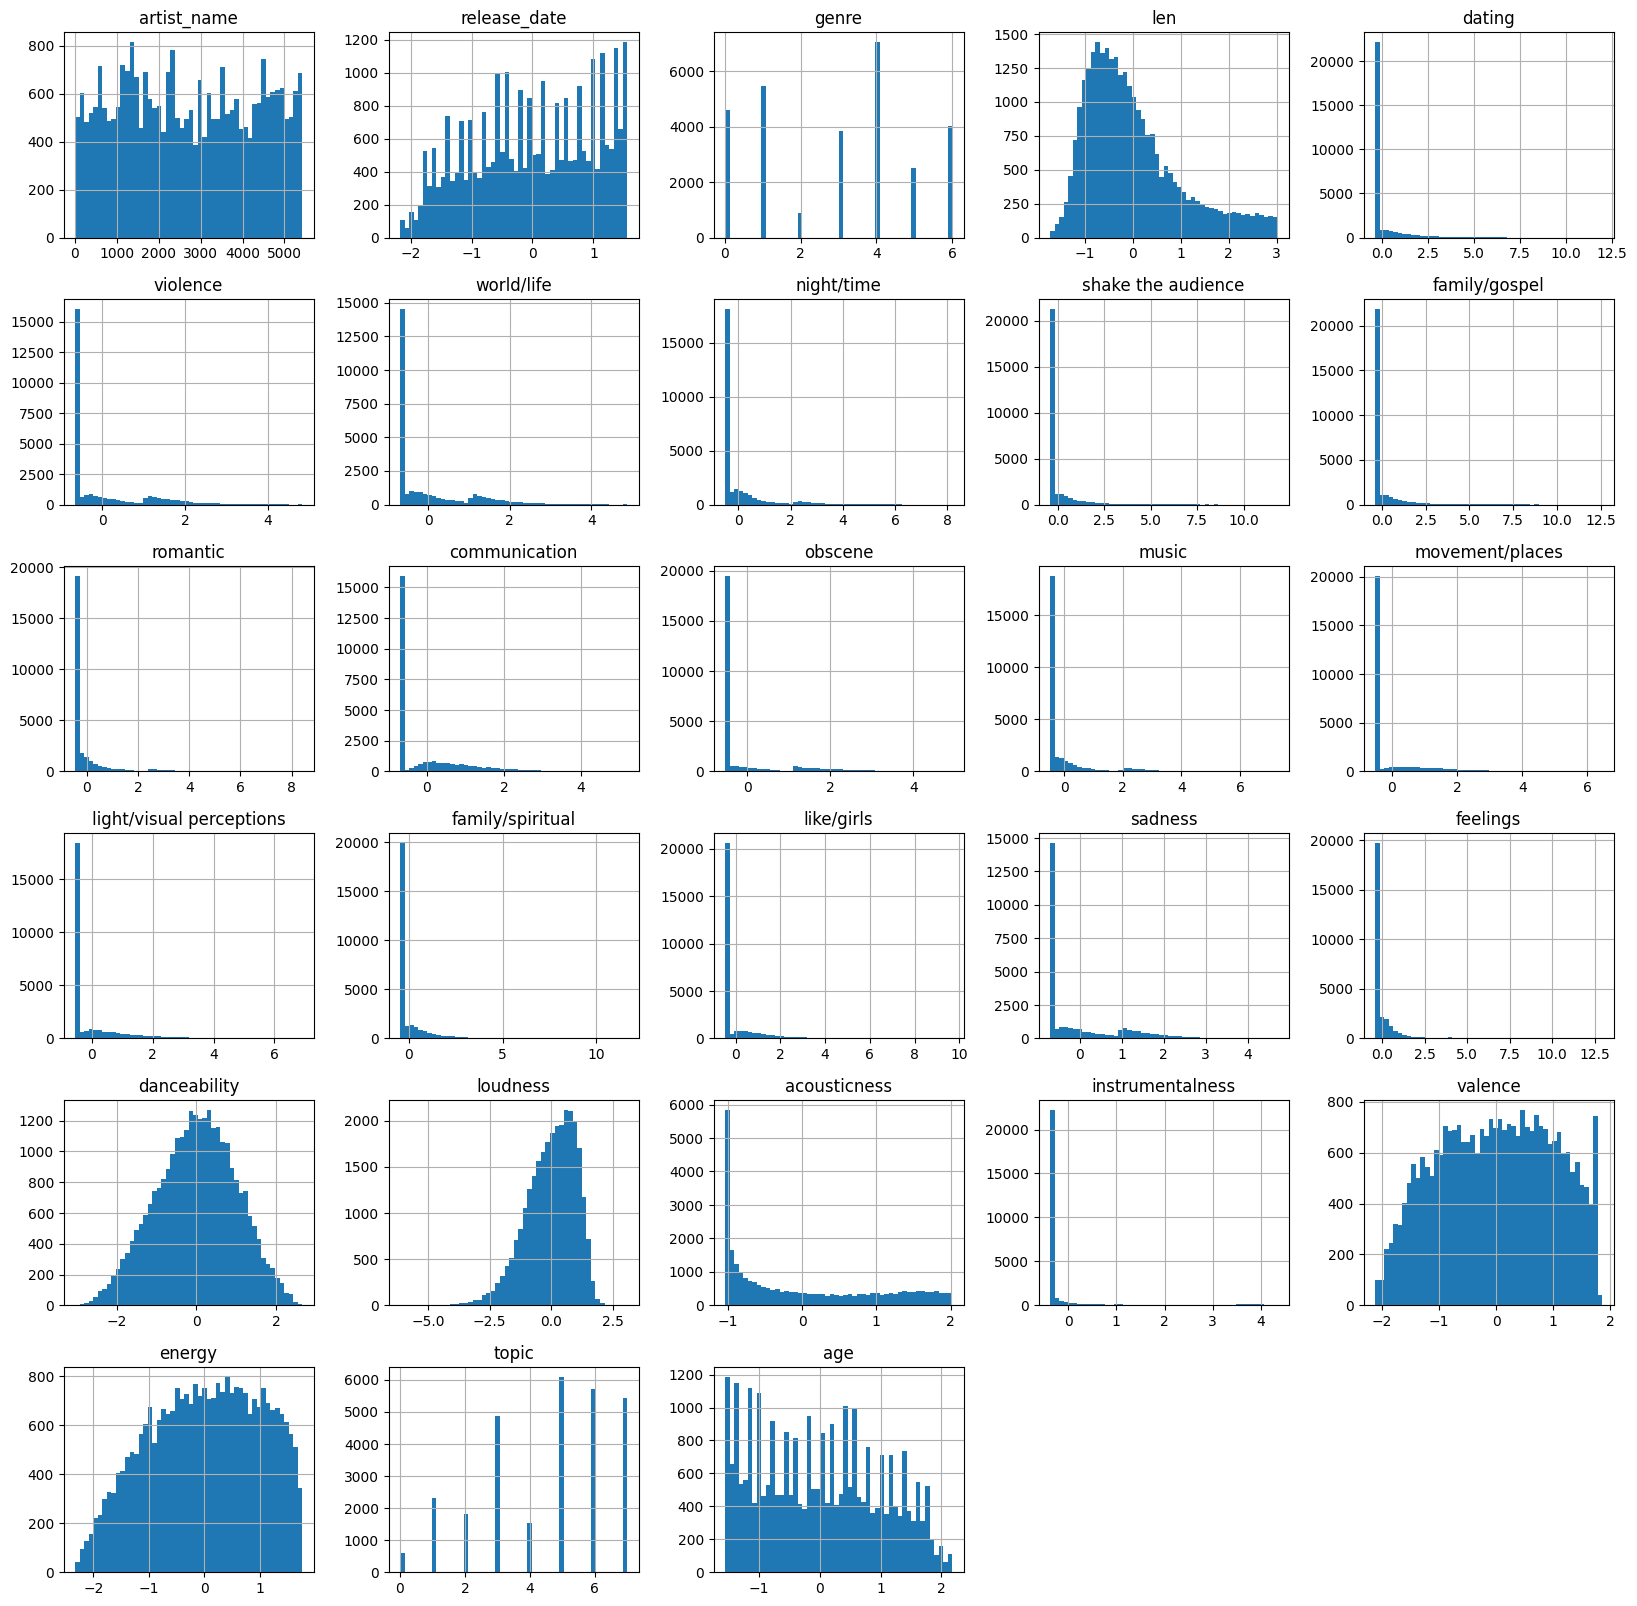

In [10]:
# PLOTTING HISTOGRAM
import matplotlib.pyplot as plt

transformed_data.hist(bins=50,figsize=(20,20))
plt.show()

# REDUCING DIMESNSIONS OF DATA TO 2 USING TSNE

In [11]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=65, n_iter=2000, random_state=42)
transformed_data = tsne.fit_transform(transformed_data)

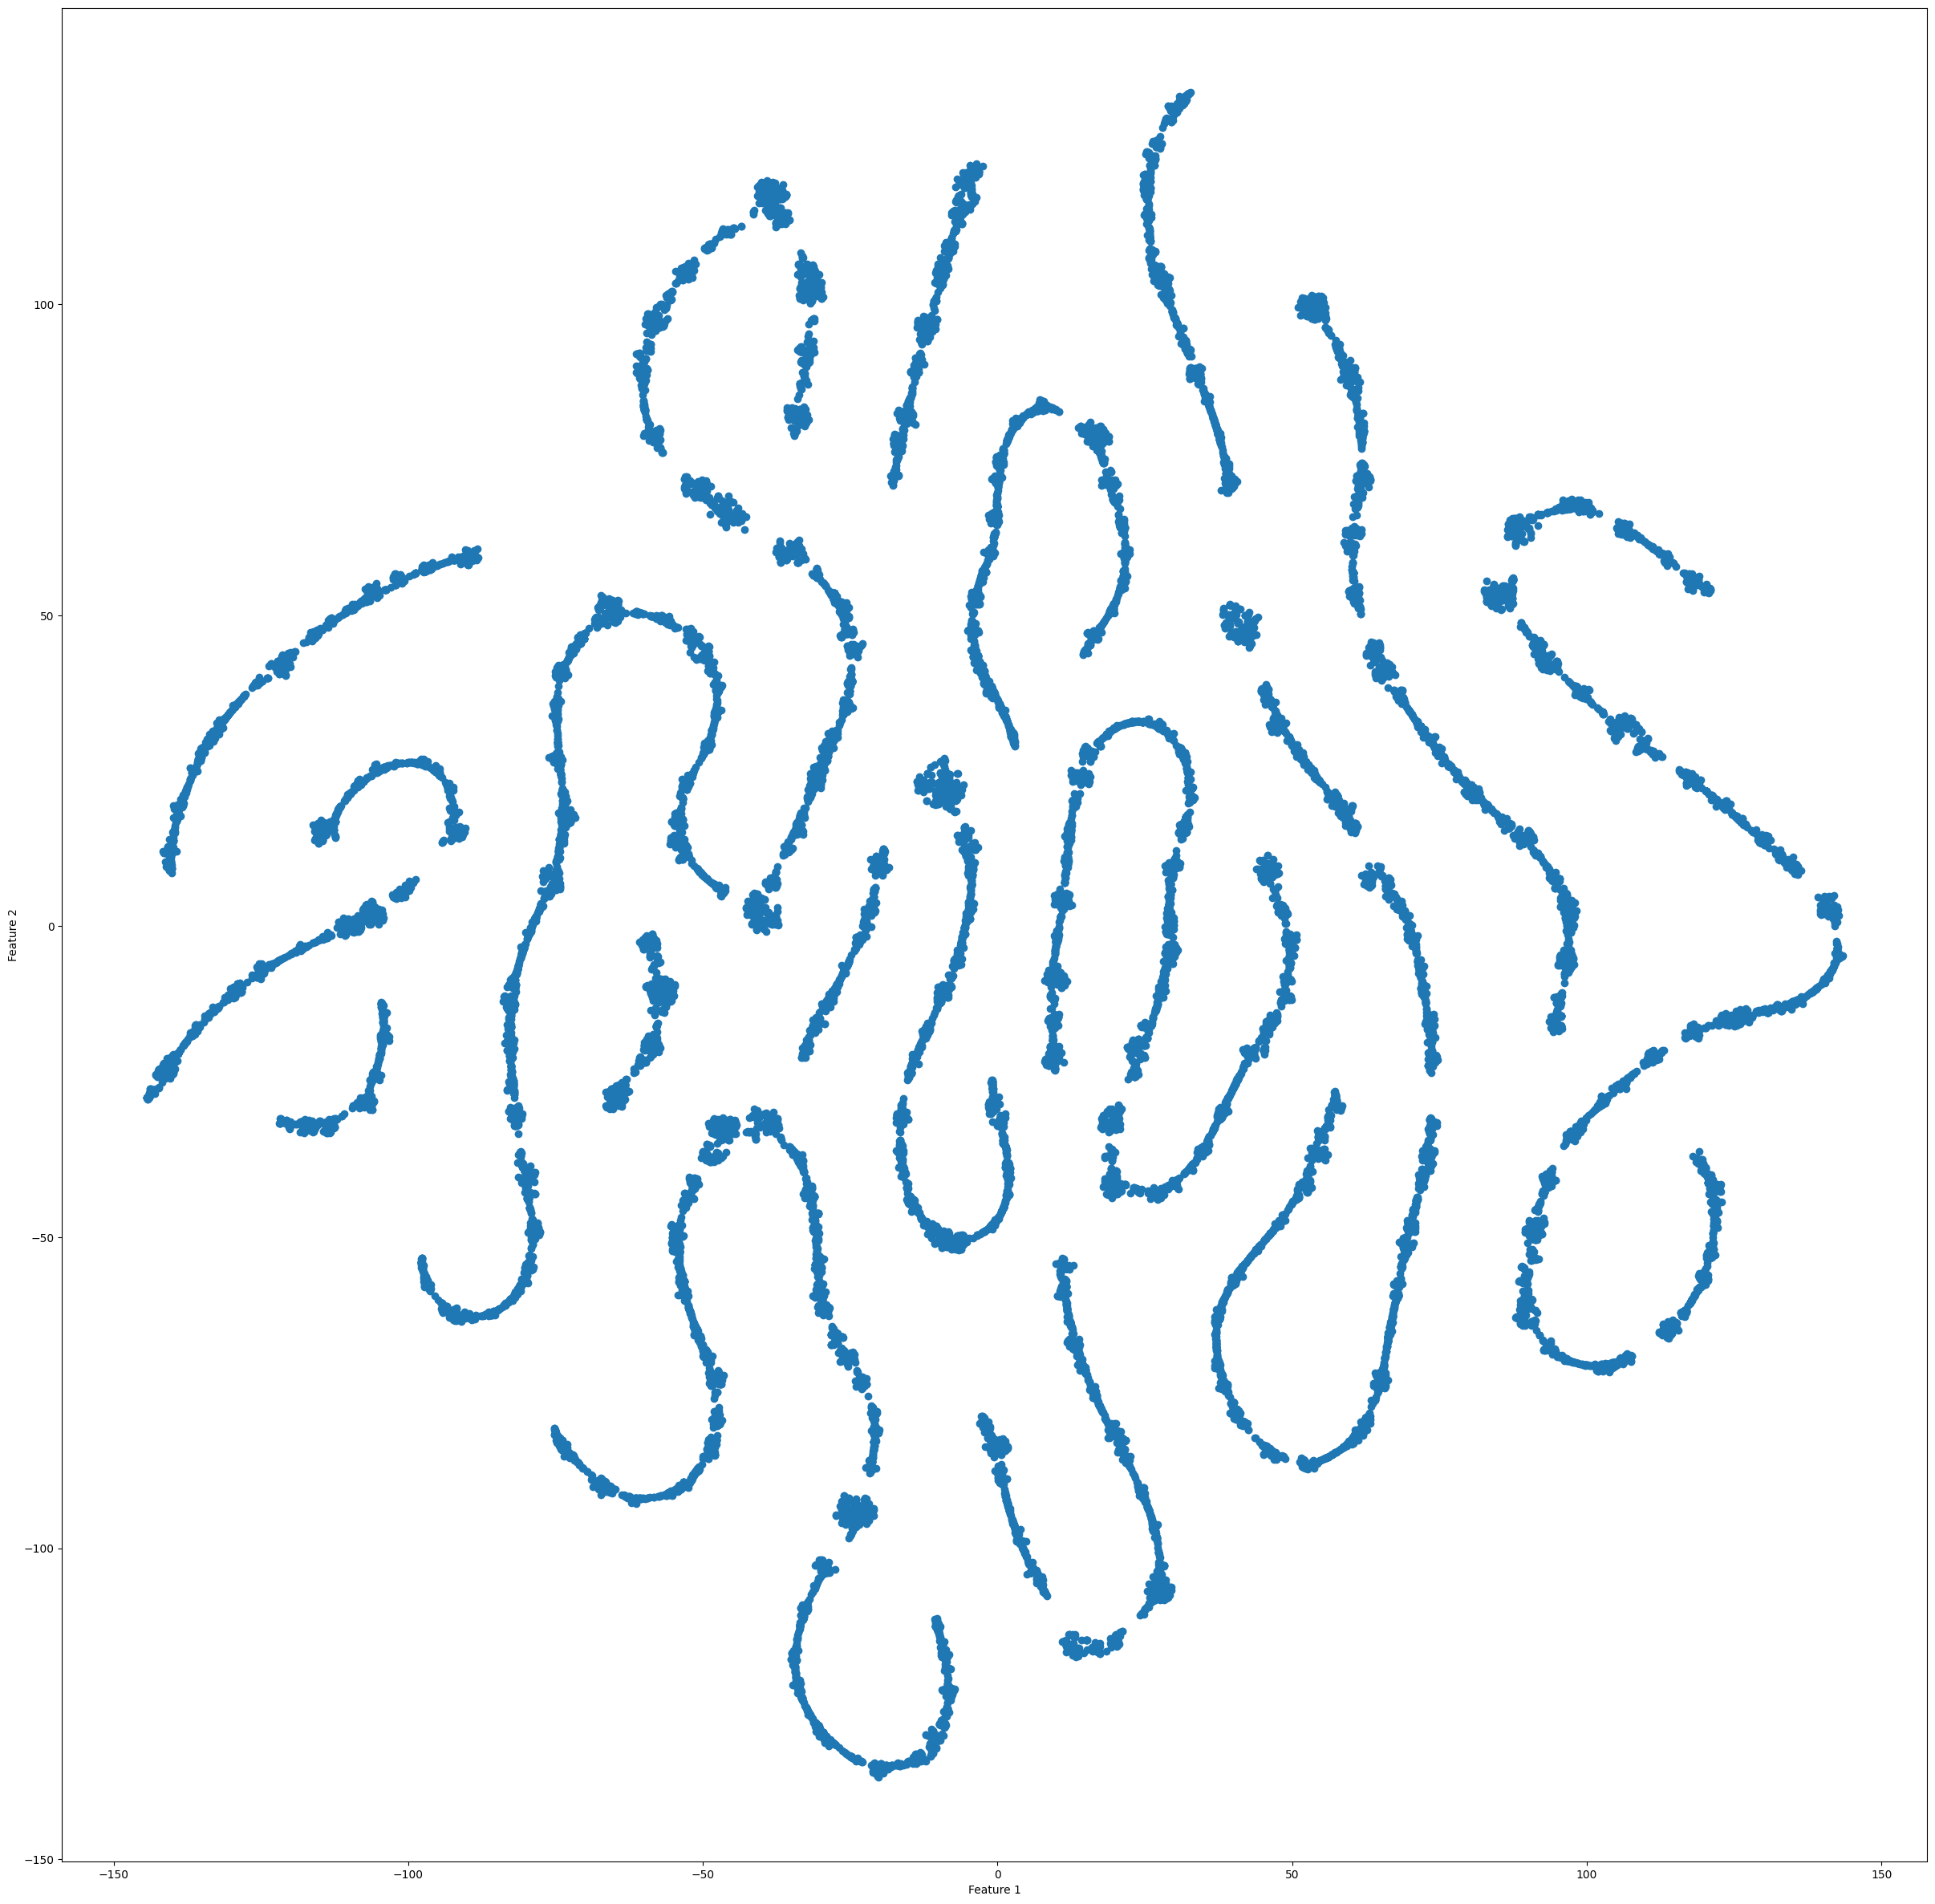

In [12]:
# PLOTTING DATA POINTS

plt.figure(figsize=(30,30))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# TRAINING MODEL

In [13]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=4, min_samples=5)
clusters = model.fit_predict(transformed_data)
clusters

array([ 0,  1,  2, ...,  4, 30, 16], dtype=int64)

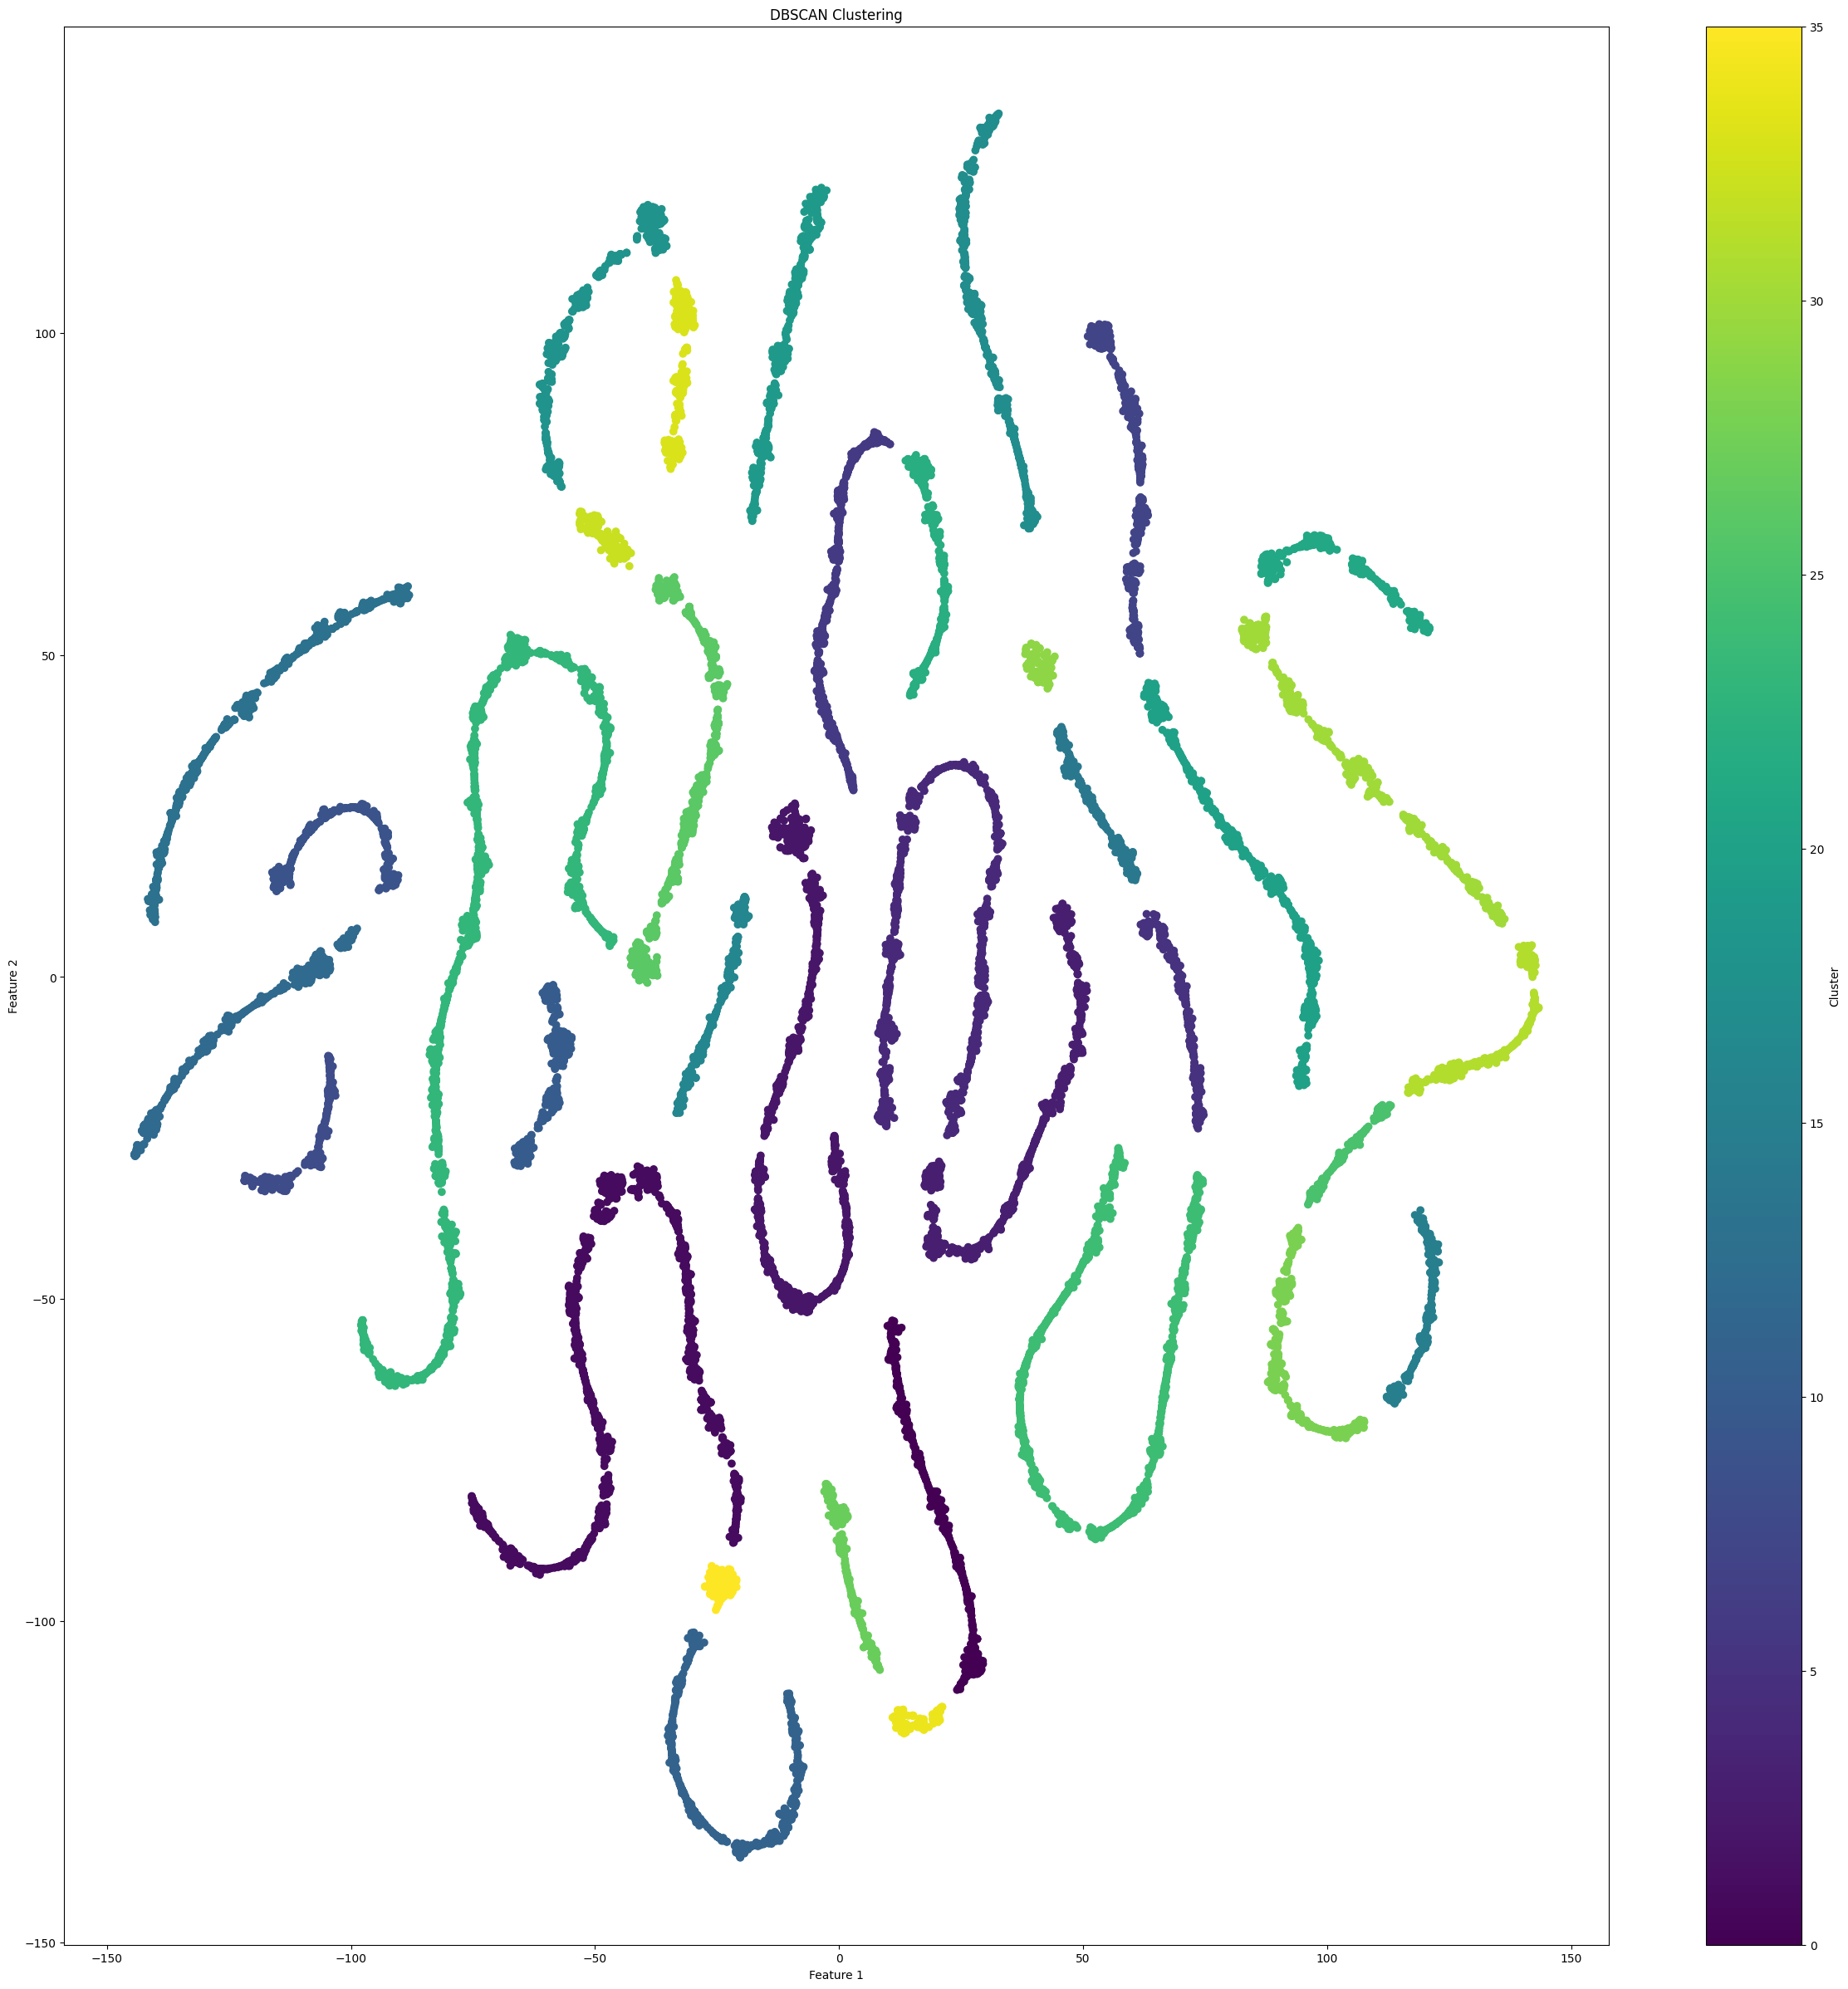

In [14]:
# VISUALIZING CLUSTERS

plt.figure(figsize=(30, 30))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1],
            c=clusters, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

In [15]:
# Performance analysis

from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

calinski_harabasz = calinski_harabasz_score(transformed_data, clusters)
davies_bouldin = davies_bouldin_score(transformed_data, clusters)


print(f"Calinski-Harabasz Index: {calinski_harabasz}")
print(f"Davies-Bouldin Index: {davies_bouldin}")

Calinski-Harabasz Index: 13734.649328308162
Davies-Bouldin Index: 1.0641845191126753


In [16]:
# GIVING CLUSTER NUMBER TO EVERY SONG
data_with_cluster = original.copy()
data_with_cluster["cluster number"]=clusters
data_with_cluster.to_csv('data_with_cluster.csv', index=False)

In [17]:
# SAVING MODEL
import joblib
joblib.dump(model, 'model_filename.pkl')
    

['model_filename.pkl']